# Task # 2

# To Explore Supervised Machine Learning

In [1]:
# Importing all necessary library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the data and displaying its first 15 rows
Data = pd.read_csv("D:\student_scores - student_scores.csv")
Data.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


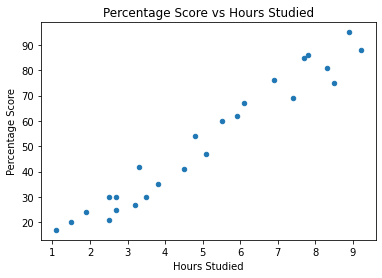

In [3]:
#Creating Scatter plot 
Data.plot.scatter(x='Hours',y='Scores')
plt.title('Percentage Score vs Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

From the Scatter plot we can conclude that Pecentage Score and Hours studied have a linear relation so, we can use linear regression 

In [4]:
# We split our dataset into 2 part one for training and another for testing 
# For training we use 80% of the data and 20% of the data is used for testing
x= Data.values[:,[0]]

y= Data.values[:,[1]]
  
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=0);

In [6]:
# We fit the linear regression using training dataset
from sklearn.linear_model import LinearRegression
lnreg=LinearRegression()
lnreg.fit(train_x,train_y)

LinearRegression()

In [7]:
y_pred_train=lnreg.predict(train_x)
y_pred_test=lnreg.predict(test_x)

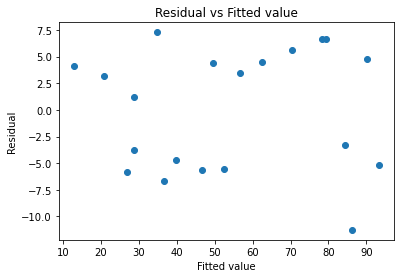

In [8]:
#Checking linearity assumption by residual vs fitted value graph
resid=(train_y-y_pred_train)
plt.scatter(x=y_pred_train,y=resid)
plt.title("Residual vs Fitted value")
plt.xlabel("Fitted value")
plt.ylabel("Residual")
plt.show()

There is no pattern is the graph so, we can say linear assumption is satisfied

# Linear Regression Equation and line


Regression Equation
Predicted Percentage Score = 9.910656 *Hours Studied + 2.018160


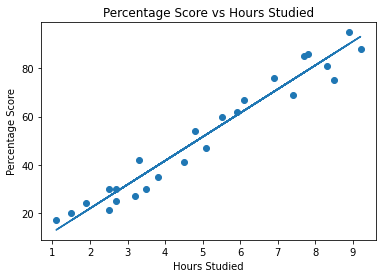

In [9]:
# Regression Line
print("Regression Equation")
print("Predicted Percentage Score = %f *Hours Studied + %f"%(lnreg.coef_,lnreg.intercept_))
Line = lnreg.coef_*x +lnreg.intercept_
plt.scatter(x,y)
plt.plot(x,Line)
plt.title('Percentage Score vs Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

# Evaluation

# Measures to check how well the model fit the data

In [10]:
from sklearn.metrics import mean_squared_error,r2_score
print("For training data")
print("Root Mean Square Error for training data")
print(np.sqrt(mean_squared_error(train_y,y_pred_train)))
print("R Square value for training data in percent")
print(r2_score(train_y,y_pred_train)*100)
print()
print("For testing data")
print("Root Mean Square Error for testing data")
print(np.sqrt(mean_squared_error(test_y,y_pred_test)))
print("R Square value for training data in percent")
print(r2_score(test_y,y_pred_test)*100)

For training data
Root Mean Square Error for training data
5.558613350226342
R Square value for training data in percent
95.15510725211553

For testing data
Root Mean Square Error for testing data
4.647447612100367
R Square value for training data in percent
94.54906892105355


In [11]:
Evaluation_Table=pd.DataFrame({'Measure':['R Square in %','Root Mean Square Error'],'Train Dataset':[95.16,5.56],\
                          'Test Dataset':[94.55,4.65]})
Evaluation_Table

,Measure,Train Dataset,Test Dataset
0,R Square in %,95.16,94.55
1,Root Mean Square Error,5.56,4.65


# Conclusion:

# 1) As the r square value for training and testing is nearly same so, we can say that the model is not overfit

# 2) Here we can see that the r square value, which tells us how much variability of the y is explained by x in other word it tells us how well the model predict the value of y for given x ,for testing data is 94.55 So, we can say that our model is a good model with great predicting capability 

# 3) With RMSE (Root Mean square error) we can see that the error while predicting is minimum

# 4) Since It is a good model then we will use this model to predict the percentage score given in our problem statement


# Predicting score if a student study for 9.25 hrs in a day

In [12]:
hours=np.array(9.25)
score = lnreg.predict(hours.reshape(1,-1))
print("Number of hours studies = %f"%hours)
print("Predicted Percentage = %f"%score)

Number of hours studies = 9.250000
Predicted Percentage = 93.691732


# Predicted percentage for a student studying for 9.25 hrs in a day is 93.69 